In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

В интервале параметра химической связи[0.050; 0.056] при электрической связи 0.01 предположительно находится хаос

In [107]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = -0.01
electrical_link = 0.01

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.01, 0.01]

In [117]:
# Инициализация интервала параметра
start_chem= -0.02 # 0.000 # Стартовое значение параметра
finish_chem = 0.056 # Конечное значение параметра
len_chem = 500 #  Длина интервала параметра
range_chem = range(start_chem, finish_chem, length = len_chem  ) # Интервал параметра

number_transient_points = 10000.0 # Время в течении которого эволюционирует траектория, перед сохранением точек
number_save_points = 500.0 # Время в течении которого сохраняются точки

idx_control_p = 10 # Индекс управляющего параметра

tstep = 0.01 # Шаг по времени для интегратора
setting_integrate = (alg = Vern9(), adaptive = false, dt = tstep); # Настройки интегратора

# Сечение Пуанкаре
idx_fix_var = 2 # Индекс фиксируемой переменной
val_fix = 0.0 # Значение фиксируемой переменной
surface = (idx_fix_var, val_fix) # Инициализация сечения Пуанкаре
setting_root = (xrtol = 1e-11, atol = 1e-11) # Настройки Для сечения Пуанкаре

(xrtol = 1.0e-11, atol = 1.0e-11)

In [118]:
idx_save_var = 1 # Индекс сохраняемой переменной
x_1 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = -0.02
parameter = -0.019847695390781562
parameter = -0.019695390781563127
parameter = -0.01954308617234469
parameter = -0.019390781563126253
parameter = -0.019238476953907815
parameter = -0.01908617234468938
parameter = -0.01893386773547094
parameter = -0.018781563126252506
parameter = -0.018629258517034068
parameter = -0.018476953907815633
parameter = -0.018324649298597194
parameter = -0.01817234468937876
parameter = -0.01802004008016032
parameter = -0.017867735470941885
parameter = -0.017715430861723447
parameter = -0.01756312625250501
parameter = -0.017410821643286573
parameter = -0.017258517034068135
parameter = -0.0171062124248497
parameter = -0.01695390781563126
parameter = -0.016801603206412826
parameter = -0.016649298597194388
parameter = -0.016496993987975953
parameter = -0.016344689378757514
parameter = -0.01619238476953908
parameter = -0.01604008016032064
parameter = -0.015887775551102205
parameter = -0.015735470941883767
parameter = -0.01558316633266533
paramete

In [119]:
idx_save_var = 4 # Индекс сохраняемой переменной
x_2 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = -0.02
parameter = -0.019847695390781562
parameter = -0.019695390781563127
parameter = -0.01954308617234469
parameter = -0.019390781563126253
parameter = -0.019238476953907815
parameter = -0.01908617234468938
parameter = -0.01893386773547094
parameter = -0.018781563126252506
parameter = -0.018629258517034068
parameter = -0.018476953907815633
parameter = -0.018324649298597194
parameter = -0.01817234468937876
parameter = -0.01802004008016032
parameter = -0.017867735470941885
parameter = -0.017715430861723447
parameter = -0.01756312625250501
parameter = -0.017410821643286573
parameter = -0.017258517034068135
parameter = -0.0171062124248497
parameter = -0.01695390781563126
parameter = -0.016801603206412826
parameter = -0.016649298597194388
parameter = -0.016496993987975953
parameter = -0.016344689378757514
parameter = -0.01619238476953908
parameter = -0.01604008016032064
parameter = -0.015887775551102205
parameter = -0.015735470941883767
parameter = -0.01558316633266533
paramete

In [122]:
x_sum = x_1 + x_2;

In [33]:
lab_size = 25; tick_size = 15

15

### Попытка понять, что за г справа от нуля

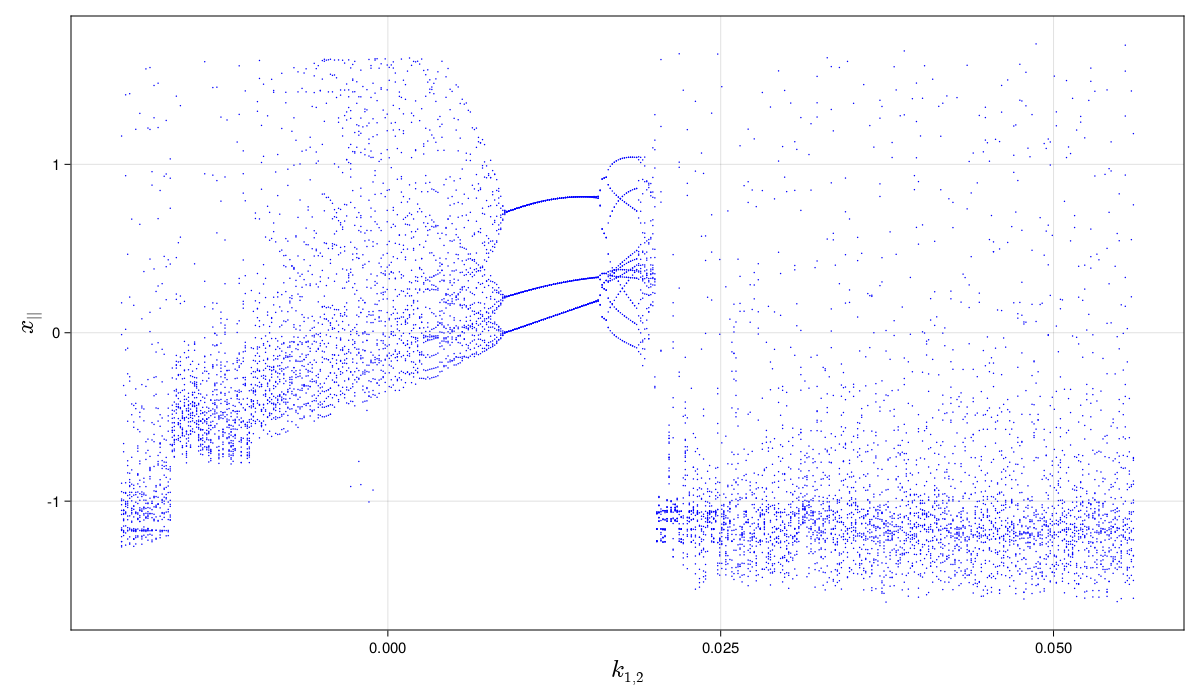

In [123]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

### range[-0.1; 0.056]

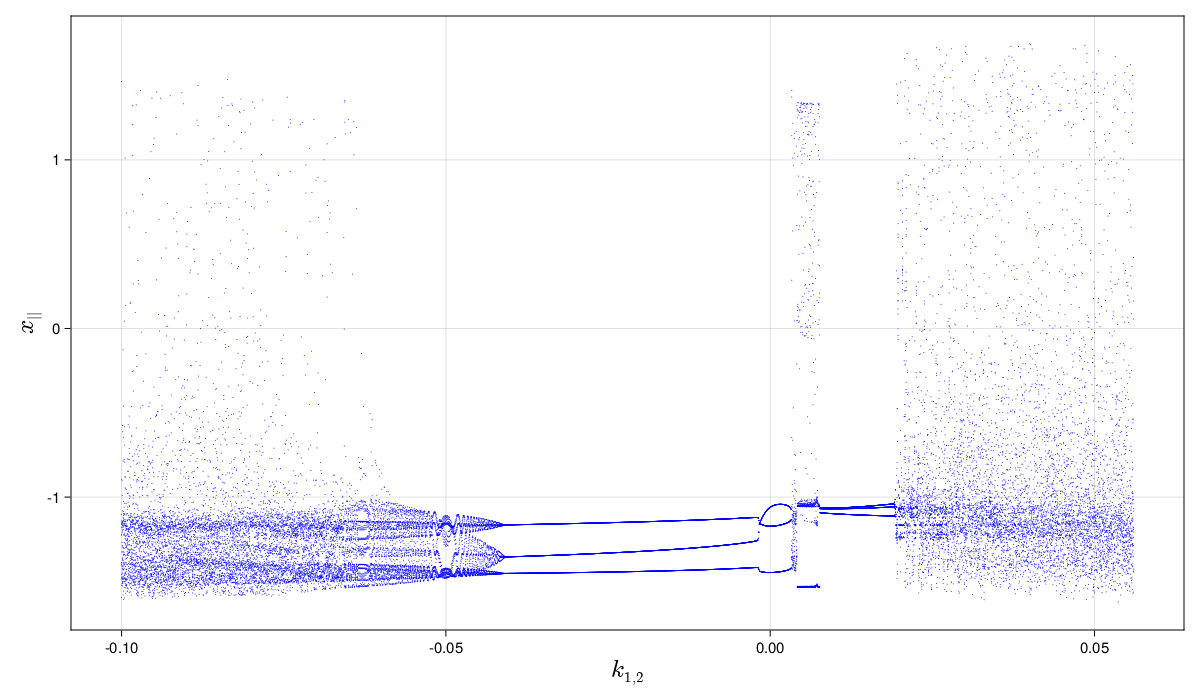

In [99]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
fig

In [ ]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
ylims!(axis, -1.5, -0.8)
fig

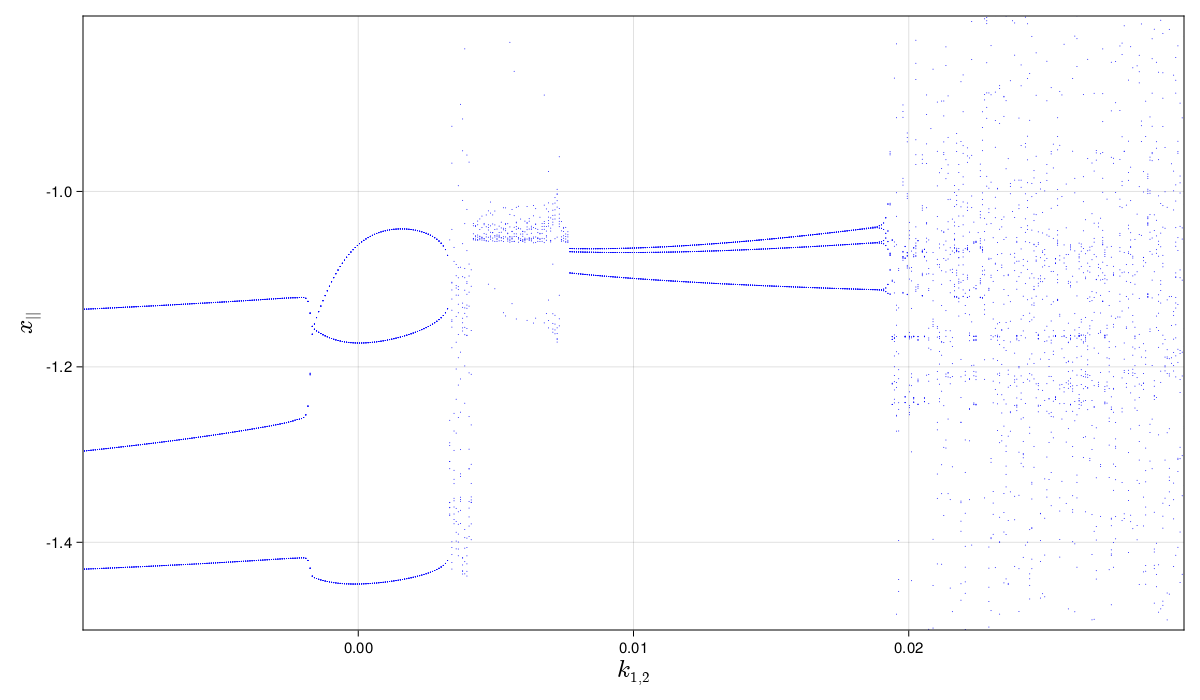

In [106]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
ylims!(axis, -1.5, -0.8)
xlims!(axis, -0.01, 0.03)
fig

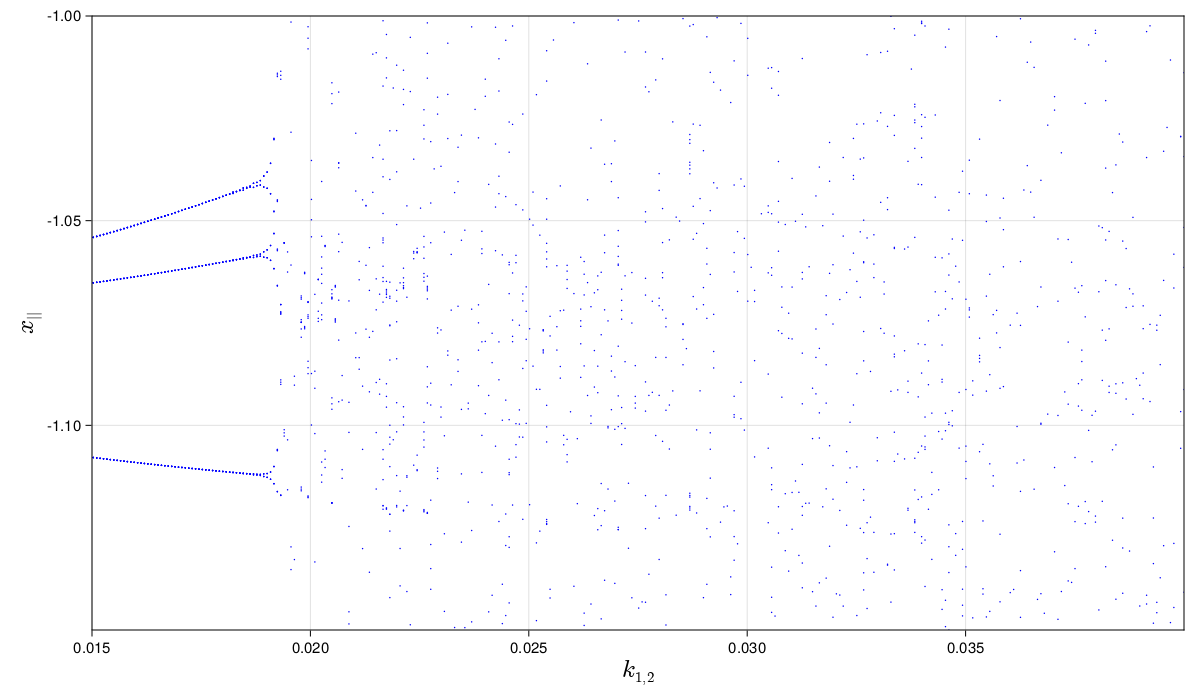

In [105]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
xlims!(axis, 0.015, 0.04)
ylims!(axis, -1.15, -1.)
fig

### range [0.0; 0.056]

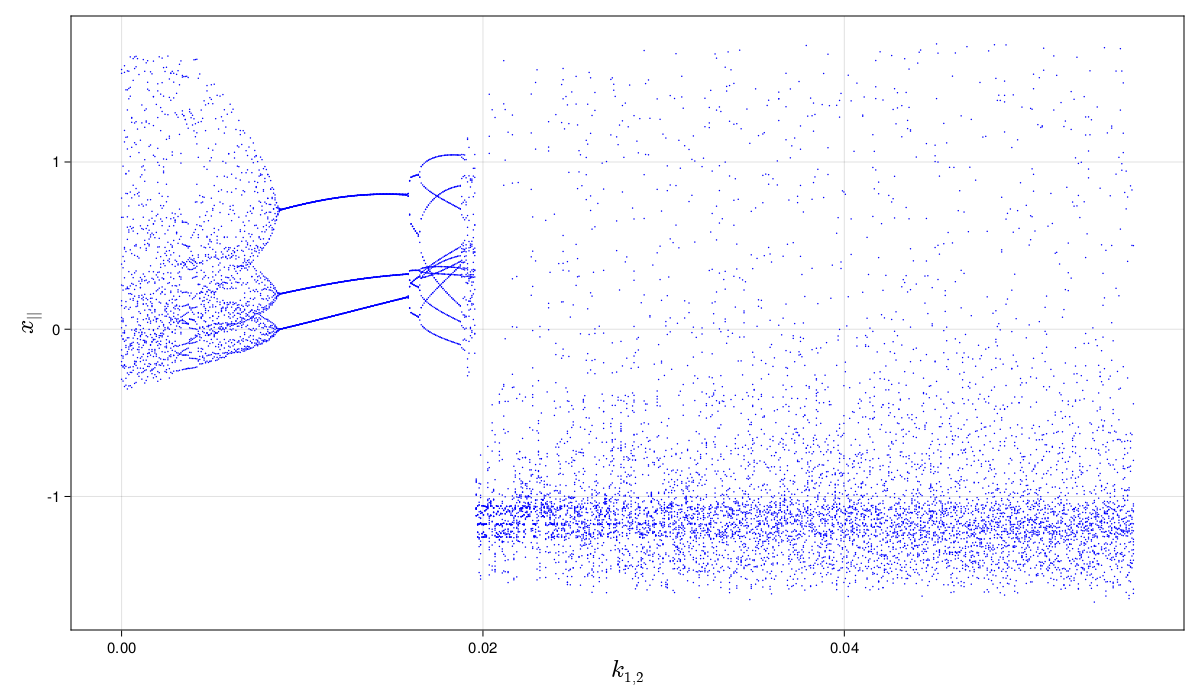

In [40]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig